In [2]:
%matplotlib inline
#import data inspired by https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies

import pathlib
import imageio
import numpy as np
import matplotlib.pyplot as plt

# Glob the training data and load a single image path
training_paths = pathlib.Path('C:/Users/pc/Python_Projects/MachineLearningWARWICK/Ass2data/FullTraining').glob('*/images/*.png')
training_sorted = sorted([x for x in training_paths])

masks_paths = pathlib.Path('C:/Users/pc/Python_Projects/MachineLearningWARWICK/Ass2data/FullTraining').glob('*/masks/*.png')
masks_sorted = sorted([x for x in masks_paths])

testing_paths = pathlib.Path('C:/Users/pc/Python_Projects/MachineLearningWARWICK/Ass2data/FullTesting').glob('*/images/*.png')
testing_sorted = sorted([x for x in testing_paths])

#test images
im_path = training_sorted[45]
im = imageio.imread(str(im_path))

im_path2 = masks_sorted[45]
im2 = imageio.imread(str(im_path2))


In [3]:
#gray version
from skimage.color import rgb2gray
def gray_scale(im):
    im_gray = rgb2gray(im)
    return im_gray

In [4]:
#Here we try to apply HoG tecnique:
from skimage.feature import hog
from skimage import data, exposure

#should apply this to gray scale image

def HoG(im):
    fd,hog_image = hog(im, orientations=16, pixels_per_cell=(2, 2),cells_per_block=(3, 3),visualise=True)
    return fd,hog_image

In [5]:
#Here we try to use thresholding to separate
#taken from https://www.kaggle.com/stkbailey/teaching-notebook-for-total-imaging-newbies
from skimage.filters import threshold_otsu


def otsu(im):
    thresh_val = threshold_otsu(im)
    mask = np.where(im > thresh_val, 1, 0)

    # Make sure the larger portion of the mask is considered background
    if np.sum(mask==0) < np.sum(mask==1):
        mask = np.where(mask, 0, 1)
    return mask

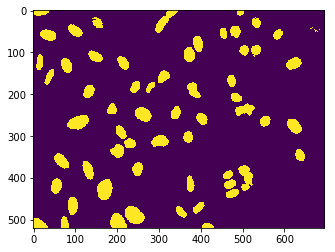

In [6]:
plt.imshow(otsu(gray_scale(im)))

In [7]:
# Deriving individual mask for each object

def find_labels(mask):    
    labels, numlabels = ndimage.label(mask)    
    label_arrays = []
    im_df = pd.DataFrame(columns=["ImageID","EncodedPixels"])
    for n in range(1, numlabels+1, 1):
        label_mask = np.where(labels == n, 1, 0)
        #only takes masks abovea certan threshold
        if sum(sum(label_mask))>=10:        
            label_arrays.append(label_mask)
        else:
            mask = np.where(labels == n, 0, mask)
            numlabels += -1
    labels, nlabels = ndimage.label(mask)
    return (labels,numlabels)



In [8]:
#rle encoding
def rle_encoding(x):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten()==1)[0] 
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return " ".join([str(i) for i in run_lengths])

In [9]:
def create_row(labels, numlabels, image_id):
    row = pd.DataFrame(columns=["ImageID","EncodedPixels"])
    for n in range(1, numlabels+1, 1):
            label_mask = np.where(labels == n, 1, 0)
            rle_string = rle_encoding(label_mask)
            series = pd.Series({'ImageID': image_id, 'EncodedPixels': rle_string})
            row = row.append(series, ignore_index=True)

    return row

In [10]:
import pandas as pd
import skimage
from scipy import ndimage 
from skimage.morphology import watershed
from skimage.feature import peak_local_max
# prediction using no NN
def predict_no_NN():
    
    #df to output
    df = pd.DataFrame(columns=["ImageID","EncodedPixels"])
    for image_path in testing_sorted:
        im_id = image_path.parts[-3]
        im = imageio.imread(str(image_path))
        im_gray = gray_scale(im)
        mask = otsu(im_gray)
        labels,numlabels = find_labels(mask)
        row = create_row(labels,numlabels,im_id)
        df = df.append(row, ignore_index=True)
        
        print('hshshs')    
    return df

    

In [11]:
df = predict_no_NN()
df.to_csv(path_or_buf='../submission.csv', index=None)

hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
hshshs
